# Political Advertisements from Facebook


It contains the information about political advertisement that were run on the facebook platform.mainly aiming to provide better insights of the political adverysising campaigns.

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import json


In [9]:
#Load Dataset
fb_df = pd.read_csv("./fbpac-ads-en-US.csv")

In [10]:
fb_df.head()

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977


In [11]:
fb_df.keys()

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

In [12]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

In [13]:
# Display the number of rows and columns
fb_df.shape

(162324, 24)

<AxesSubplot: >

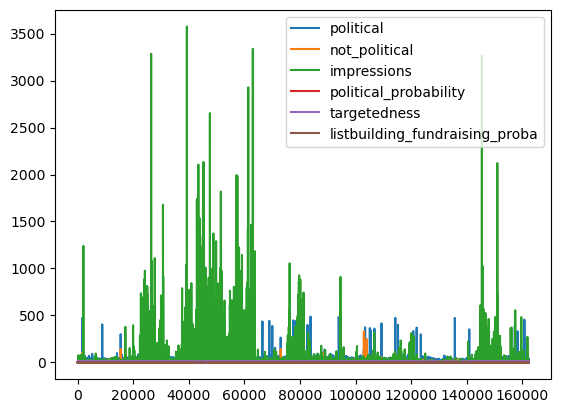

In [14]:
fb_df.plot()

1. Descriptive Statistics


In [15]:
# Summary
fb_df.describe().T


,count,mean,std,min,25%,50%,75%,max
political,162324.0,4.177663,10.574403,0.000000,0.000000,1.000000,4.000000,488.000000
not_political,162324.0,0.794214,2.770883,0.000000,0.000000,0.000000,1.000000,330.000000
impressions,162324.0,4.605049,40.689815,0.000000,1.000000,1.000000,2.000000,3575.000000
political_probability,162324.0,0.928099,0.169513,0.000079,0.951812,0.997825,0.999978,1.000000
targetedness,112747.0,3.939723,1.758957,0.000000,3.000000,4.000000,4.000000,12.000000
listbuilding_fundraising_proba,152394.0,0.545964,0.333821,0.000091,0.265190,0.423612,0.999893,1.230622


- given statistics indicate that political advertisements tend to have a higher count on average compared to non-political advertisements. The number of impressions varies widely, with some ads receiving significantly higher impressions than others. Political advertisements have a high probability of being classified as political. The targetedness score ranges from low to high, with a moderately high level being the most common. The probability of listbuilding or fundraising activities in advertisements varies, with a wide range of values.

In [16]:

# Dividing categorical and  Numerical columns:
categorical_columns =[]
for col in fb_df.columns:
       if fb_df[col].dtype == object:
            categorical_columns.append(col)
categorical_columns

['id',
 'html',
 'title',
 'message',
 'thumbnail',
 'created_at',
 'updated_at',
 'lang',
 'images',
 'targeting',
 'suppressed',
 'targets',
 'advertiser',
 'entities',
 'page',
 'lower_page',
 'targetings',
 'paid_for_by']

In [17]:
numeric_columns = []
for col in fb_df.columns:
    if col not in categorical_columns:
        numeric_columns.append(col)
numeric_columns

['political',
 'not_political',
 'impressions',
 'political_probability',
 'targetedness',
 'listbuilding_fundraising_proba']

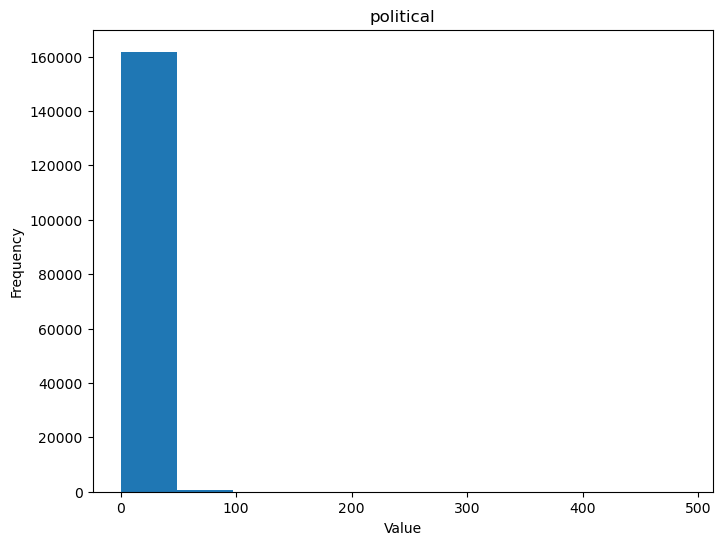

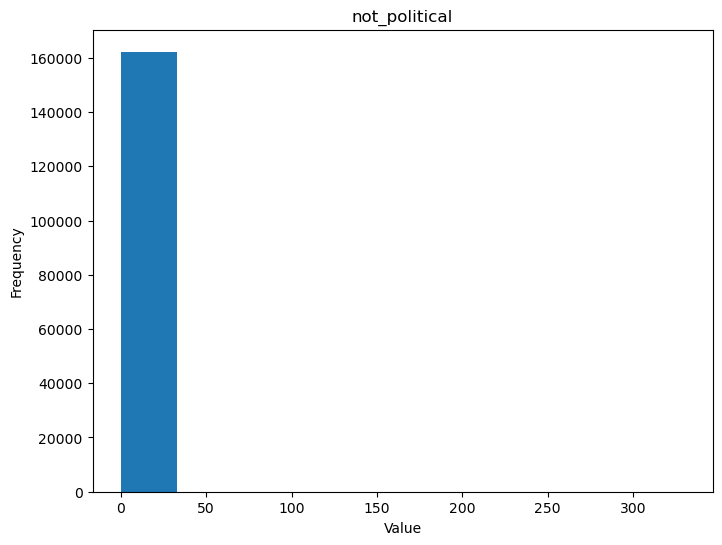

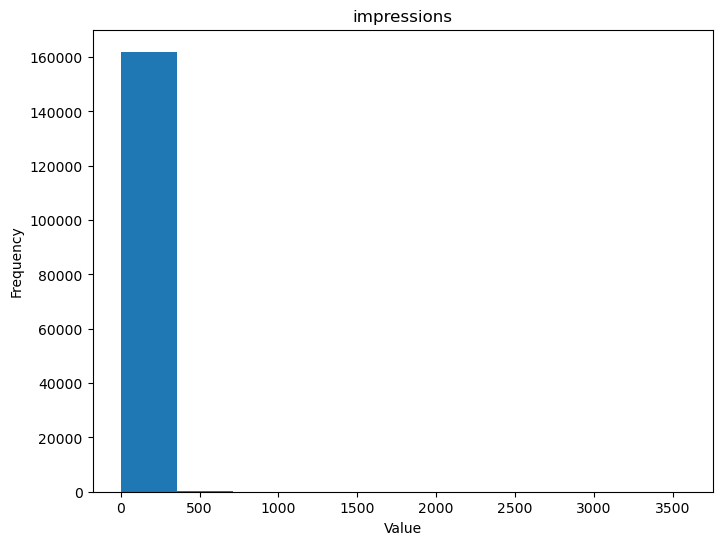

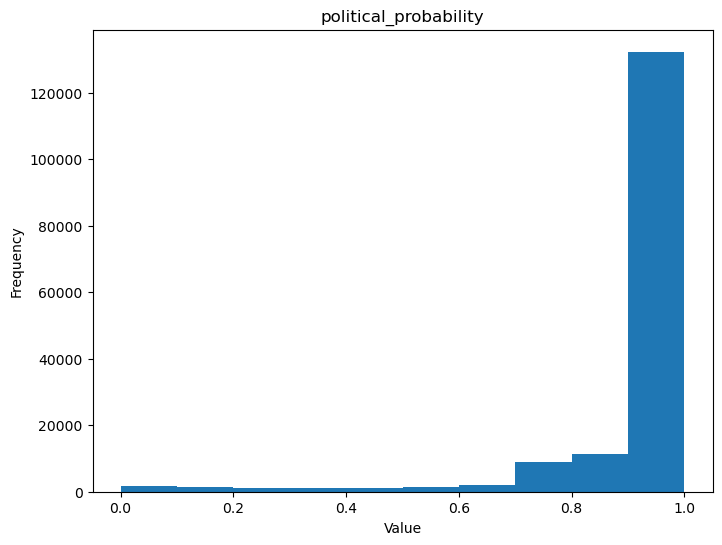

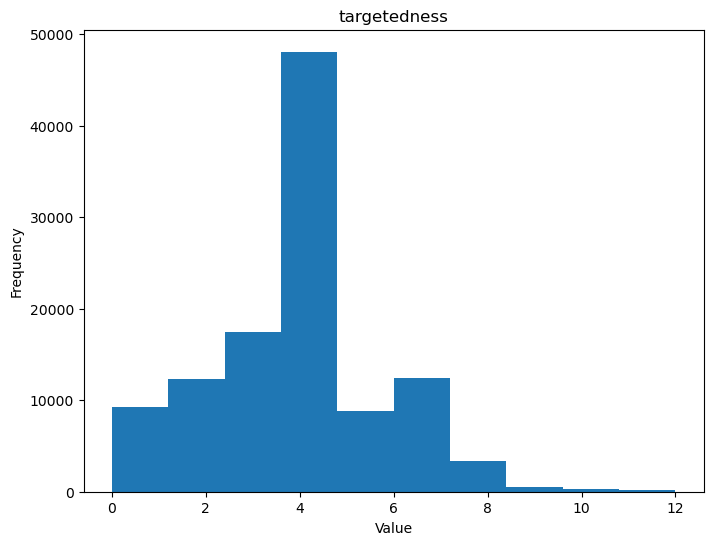

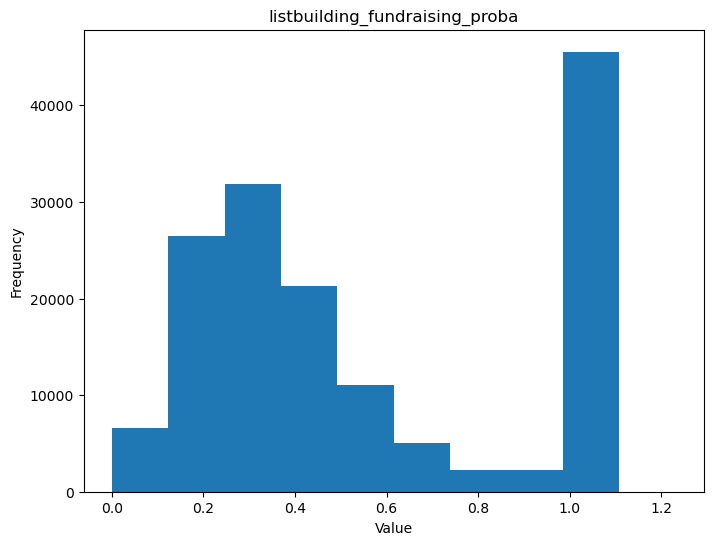

In [18]:
#Distribution of numeric column
#Plot histograms for each column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(fb_df[col])
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# # plot distribution of values in political column
# fb_df['political'].plot(kind='kde')


In [20]:
# # plot distribution of values in non political column
# fb_df['not_political'].plot(kind='kde')

In [21]:
# Check if it follows normal distribution

for column in numeric_columns:
    data = fb_df[column]  
    
    # Perform Shapiro-Wilk test
    shapiro_test = stats.shapiro(data)
    
    print(f"Shapiro-Wilk test for column '{column}':")
    print("Test statistic:", shapiro_test.statistic)
    print("p-value:", shapiro_test.pvalue)
    # Check the results
    alpha = 0.05
    if shapiro_test.pvalue > alpha:
        print("The data follows a normal distribution.")
    else:
        print("The data does not follow a normal distribution.")
    
    print()


Shapiro-Wilk test for column 'political':
Test statistic: 0.3647776246070862
p-value: 0.0
The data does not follow a normal distribution.

Shapiro-Wilk test for column 'not_political':
Test statistic: 0.2810543179512024
p-value: 0.0
The data does not follow a normal distribution.

Shapiro-Wilk test for column 'impressions':
Test statistic: 0.053736746311187744
p-value: 0.0
The data does not follow a normal distribution.

Shapiro-Wilk test for column 'political_probability':
Test statistic: 0.4800832271575928
p-value: 0.0
The data does not follow a normal distribution.

Shapiro-Wilk test for column 'targetedness':
Test statistic: nan
p-value: 1.0
The data follows a normal distribution.

Shapiro-Wilk test for column 'listbuilding_fundraising_proba':
Test statistic: nan
p-value: 1.0
The data follows a normal distribution.



c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
# proportion = 1000 / 162324


In [23]:
# sample_size_political = int(162324 * proportion / 2)
# sample_size_non_political = int(162324 * proportion / 2)


In [24]:
# #  sample sizes for each group
# sample_size_political = 500
# sample_size_non_political = 500

# # Split the dataset into political and non-political groups
# political_groups = fb_df[fb_df['political'] == 1]
# non_political_groups = fb_df[fb_df['not_political'] == 1]

# # Perform stratified sampling within each group
# stratified_sample_political = political_groups.sample(n=sample_size_political, random_state=42)
# stratified_sample_non_political = non_political_groups.sample(n=sample_size_non_political, random_state=42)

# # Combine the sampled DataFrames to form the final stratified sample
# fb_sample_df = pd.concat([stratified_sample_political, stratified_sample_non_political])



In [25]:
# Correlation 
#Correlation

correlation_matrix = fb_df.corr()
correlation_matrix

,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
political,1.000000,0.267615,-0.004525,0.113638,0.049682,-0.099580
not_political,0.267615,1.000000,0.008487,-0.013219,-0.040422,0.018845
impressions,-0.004525,0.008487,1.000000,0.009100,-0.015223,0.011552
political_probability,0.113638,-0.013219,0.009100,1.000000,0.016359,0.050328
targetedness,0.049682,-0.040422,-0.015223,0.016359,1.000000,-0.205439
listbuilding_fundraising_proba,-0.099580,0.018845,0.011552,0.050328,-0.205439,1.000000


<AxesSubplot: >

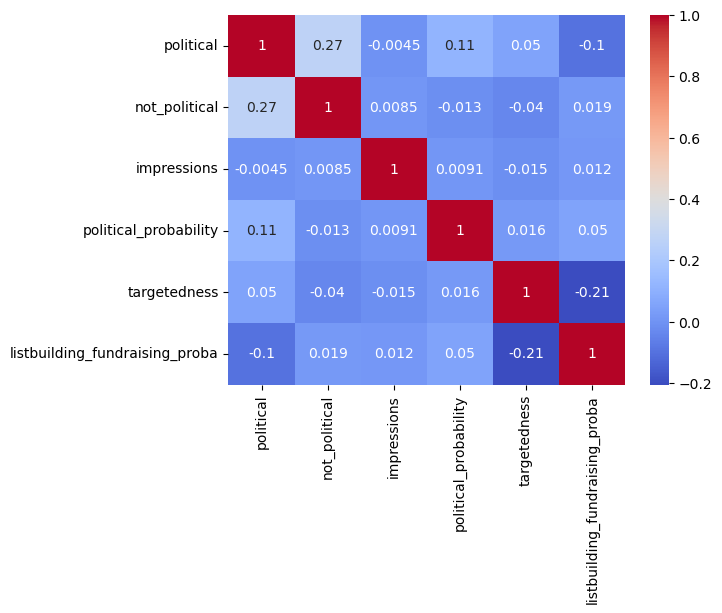

In [26]:
# Visualize using Heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

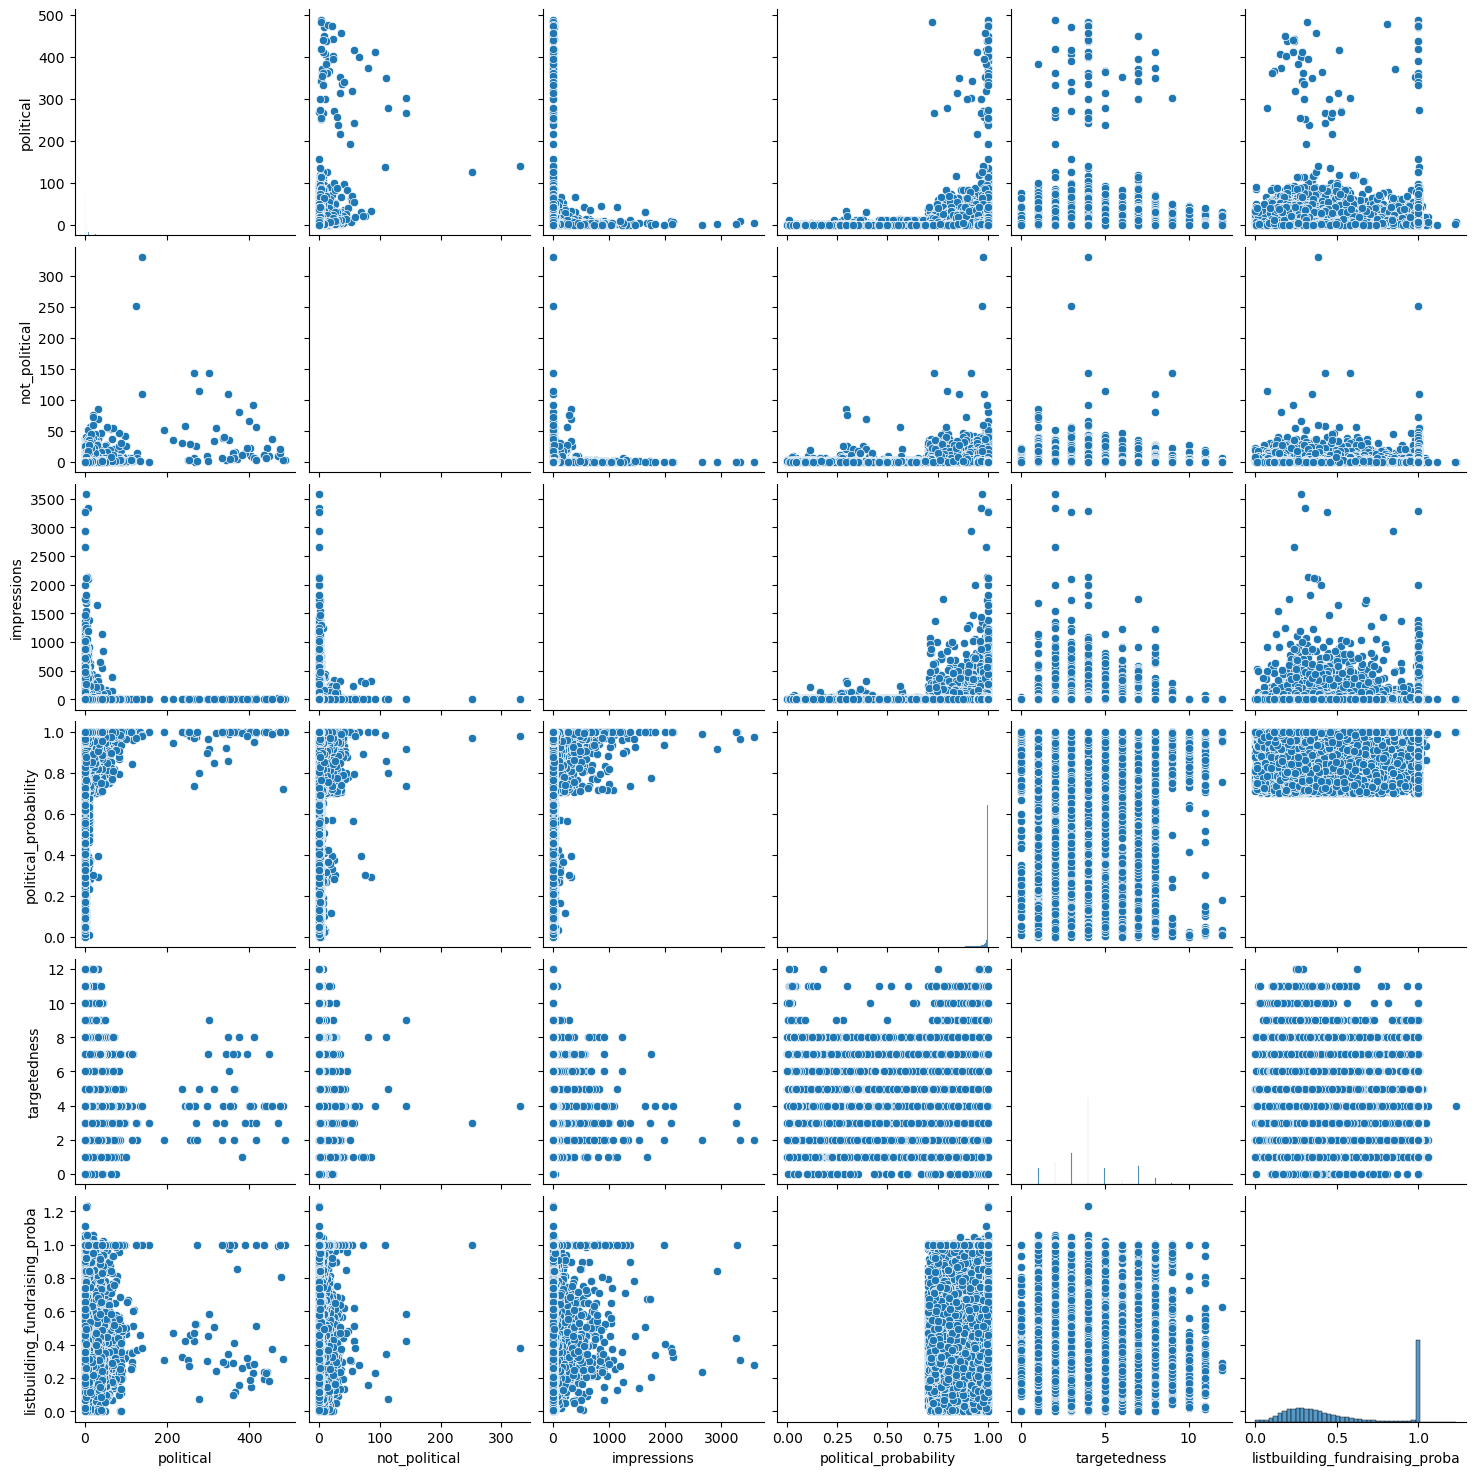

In [27]:
# PairPlot
sns.pairplot(fb_df)
plt.show()


In [28]:
fb_df.head()

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977


EDA

In [29]:
#Missing values
fb_df.isnull().sum()

id                                    0
html                                  0
political                             0
not_political                         0
title                                18
message                               0
thumbnail                             0
created_at                            0
updated_at                            0
lang                                  0
images                                0
impressions                           0
political_probability                 0
targeting                         46258
suppressed                            0
targets                            4207
advertiser                        37711
entities                           3666
page                               2560
lower_page                         2560
targetings                        48262
paid_for_by                       50279
targetedness                      49577
listbuilding_fundraising_proba     9930
dtype: int64

In [30]:
# List of columns to remove
columns_to_remove = ['id', 'html', 'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
                     'targeting', 'suppressed', 'entities',
                     'lower_page', 'targetings']

# Dropping the columns
fb_df_new = fb_df.drop(columns=columns_to_remove)

# Printing the updated DataFrame
fb_df_new

,political,not_political,title,message,impressions,political_probability,targets,advertiser,page,paid_for_by,targetedness,listbuilding_fundraising_proba
0,0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,1,0.999992,[],NaN,https://www.facebook.com/LCVoters/,League of Conservation Voters,NaN,0.647945
1,0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,1,0.999997,[],NaN,https://www.facebook.com/indivisibleguide/,Indivisible Project,NaN,0.350635
2,0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,1,0.977570,[],NaN,https://www.facebook.com/InternationalRescueCo...,International Rescue Committee,NaN,0.999909
3,0,0,Covenant House International,<p>What more can you do in the final hours of ...,1,0.360711,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,https://www.facebook.com/CovenantHouse/,Covenant House International,5.0,NaN
4,0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",1,0.999998,[],NaN,https://www.facebook.com/PlannedParenthood/,Planned Parenthood Federation of America,NaN,0.999977
...,...,...,...,...,...,...,...,...,...,...,...,...
162319,12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,1,0.999962,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,https://www.facebook.com/KeepThemAccountable18/,"HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,1,0.999972,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,https://www.facebook.com/NRCC/,the NRCC and not authorized by any candidate o...,4.0,0.312412
162321,0,0,POW Action Fund,<p>From your favorite peaks to the polling pla...,1,0.997301,"[{""target"": ""Segment"", ""segment"": ""US politics...",POW Action Fund,https://www.facebook.com/POWActionFund/,Protect Our Winters Action Fund,4.0,0.205220
162322,7,0,Beto O'Rourke,<p>Beto just announced he’s running for presid...,1,0.999966,[],NaN,https://www.facebook.com/betoorourke/,Beto for America,NaN,0.999994


In [31]:
# #  it's not significant to drop these column so we replace it values 'Unknown'or by empty string
fb_df_new['title'].fillna('Unknown', inplace=True)
#fb_df_new['message'].fillna('', inplace=True)
fb_df_new['advertiser'].fillna('Unknown', inplace=True)





In [32]:
#Replace it mean values
# Calculate the mean values
targetedness_mean = fb_df_new['targetedness'].mean()
listbuilding_mean = fb_df_new['listbuilding_fundraising_proba'].mean()

In [33]:
#Filling missing values with mean 
fb_df_new['targetedness'].fillna(targetedness_mean, inplace=True)
fb_df_new['listbuilding_fundraising_proba'].fillna(listbuilding_mean, inplace=True)

In [34]:
fb_df_new['paid_for_by'].fillna('Unknown', inplace=True)

In [35]:
# Replace null values in 'targets' column with 0
fb_df_new['targets'] = fb_df_new['targets'].fillna(0)

In [36]:
#Replace null values with 'Unknown' 
fb_df_new['page'] = fb_df_new['page'].fillna('Unknown')

In [37]:
fb_df_new.isnull().sum()

political                         0
not_political                     0
title                             0
message                           0
impressions                       0
political_probability             0
targets                           0
advertiser                        0
page                              0
paid_for_by                       0
targetedness                      0
listbuilding_fundraising_proba    0
dtype: int64

In [38]:
fb_df_new.head()

,political,not_political,title,message,impressions,political_probability,targets,advertiser,page,paid_for_by,targetedness,listbuilding_fundraising_proba
0,0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,1,0.999992,[],Unknown,https://www.facebook.com/LCVoters/,League of Conservation Voters,3.939723,0.647945
1,0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,1,0.999997,[],Unknown,https://www.facebook.com/indivisibleguide/,Indivisible Project,3.939723,0.350635
2,0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,1,0.977570,[],Unknown,https://www.facebook.com/InternationalRescueCo...,International Rescue Committee,3.939723,0.999909
3,0,0,Covenant House International,<p>What more can you do in the final hours of ...,1,0.360711,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,https://www.facebook.com/CovenantHouse/,Covenant House International,5.000000,0.545964
4,0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",1,0.999998,[],Unknown,https://www.facebook.com/PlannedParenthood/,Planned Parenthood Federation of America,3.939723,0.999977


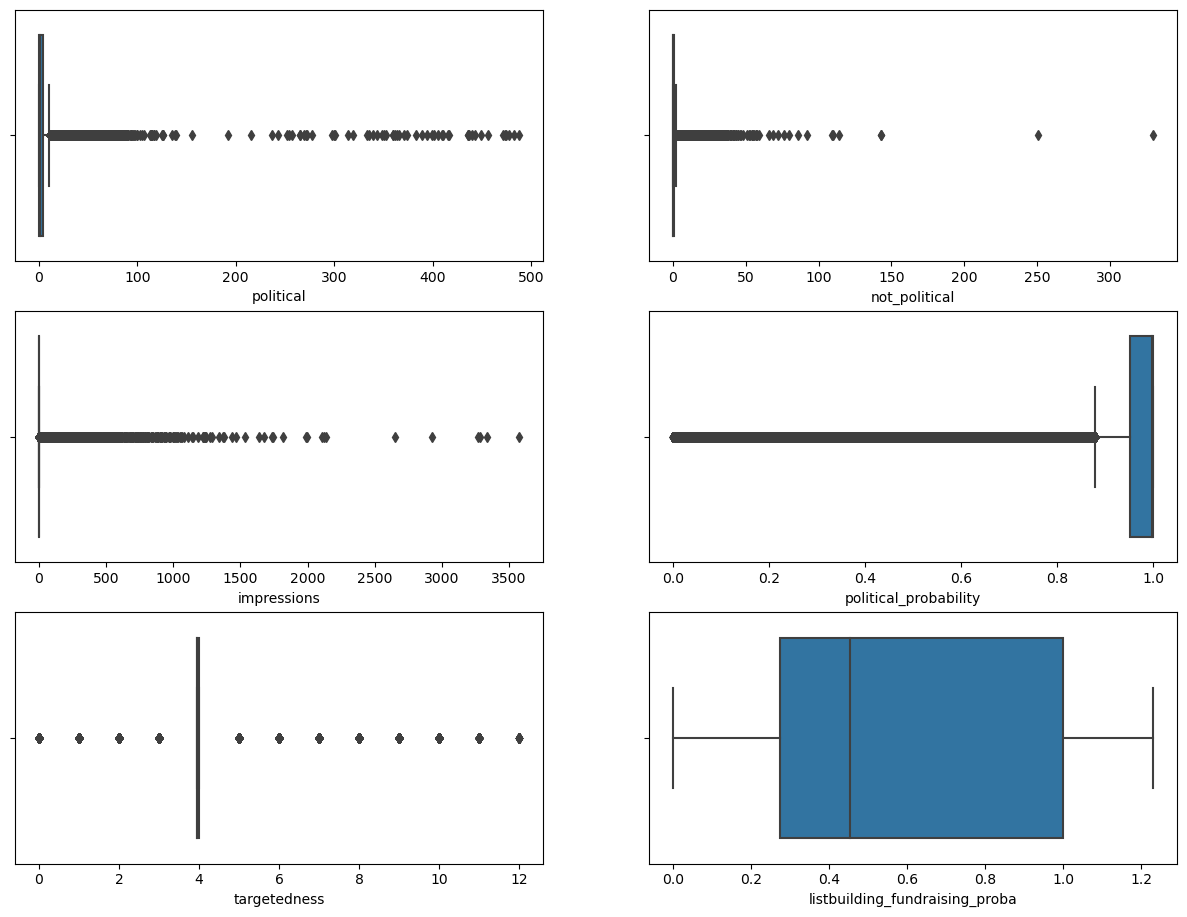

In [39]:
#Outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = fb_df_new )
plt.show()

# RESEARCH QUESTIONS 




RQ1 :  Q1. What are the most common/frequent topics, their advertisers and the impressions made?

In [40]:
topic_counts = fb_df_new[['title','advertiser','impressions']].value_counts()
print("Top 10 most common advertisement topics:")
print(topic_counts.head(10))

Top 10 most common advertisement topics:
title                           advertiser       impressions
International Rescue Committee  Unknown          1              2712
Jay Inslee                      Unknown          1              1892
Kirsten Gillibrand              Unknown          1              1201
Planned Parenthood Action       Unknown          1              1127
Amy Klobuchar                   Unknown          1              1017
Donald J. Trump                 Donald J. Trump  1               985
Beto O'Rourke                   Beto O'Rourke    1               941
Michael Bennet                  Unknown          1               932
Indivisible Guide               Unknown          1               868
Kamala Harris                   Unknown          1               864
dtype: int64


RQ2:  Who were the top advertisers? How many of them were political advertisers?

In [41]:
adv_counts = fb_df_new['advertiser'].value_counts()
print("Top 10 most common political advertisement topics:")
print(adv_counts.head(10))
print('*********************')

political_adv = fb_df_new[['advertiser','political']]
print(political_adv[:10])
print('*********************')

for adv in adv_counts:
    if adv in political_adv:
        print(adv)
    

Top 10 most common political advertisement topics:
Unknown                           37711
Beto O'Rourke                      2064
ACLU                               1577
International Rescue Committee     1476
Donald J. Trump                    1443
Planned Parenthood Action          1230
Sierra Club                        1171
Planned Parenthood                 1080
Penzeys Spices                     1026
Care2                              1019
Name: advertiser, dtype: int64
*********************
                     advertiser  political
0                       Unknown          0
1                       Unknown          0
2                       Unknown          0
3  Covenant House International          0
4                       Unknown          0
5                       Unknown          0
6                       Unknown          0
7                       Unknown          0
8                       Unknown          0
9                       Unknown          0
*********************


RQ3: What is the age of target audience? 

In [42]:
pol_adv_target = fb_df_new[['advertiser','political','targets']].sort_values(by='political',ascending=False)[:50]
pol_adv_target

,advertiser,political,targets
83806,Kirsten Gillibrand,488,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
93955,Kelly Darnley for Caledon Mayor,483,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
1725,Ammar Campa for Congress,478,"[{""target"": ""Age"", ""segment"": ""30 and older""},..."
114307,LCV Victory Fund,475,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
135744,Janet Mills,474,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
43299,The Collective PAC,471,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
160775,Yes on One,456,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
77580,Phil Bredesen,449,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
68951,Marsy's Law for Florida,443,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
78394,Independence USA,440,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."


In [43]:
pol_adv_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 83806 to 150088
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   advertiser  50 non-null     object
 1   political   50 non-null     int64 
 2   targets     50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [44]:
pol_adv_target['targets']

83806     [{"target": "Age", "segment": "18 and older"},...
93955     [{"target": "Age", "segment": "18 and older"},...
1725      [{"target": "Age", "segment": "30 and older"},...
114307    [{"target": "Age", "segment": "18 and older"},...
135744    [{"target": "Age", "segment": "18 and older"},...
43299     [{"target": "Age", "segment": "18 and older"},...
160775    [{"target": "Age", "segment": "18 and older"},...
77580     [{"target": "Age", "segment": "18 and older"},...
68951     [{"target": "Age", "segment": "18 and older"},...
78394     [{"target": "Age", "segment": "18 and older"},...
66476     [{"target": "Age", "segment": "18 and older"},...
1726      [{"target": "Age", "segment": "18 and older"},...
78393     [{"target": "Age", "segment": "18 and older"},...
150643    [{"target": "Age", "segment": "18 and older"},...
109323    [{"target": "Age", "segment": "18 and older"},...
150642    [{"target": "Age", "segment": "18 to 55"}, {"t...
114300    [{"target": "Age", "segment": 

In [45]:
target_age = pol_adv_target['targets']

# List to store the extracted segments
segments = []

# Iterate over each targeting entry
for entry in target_age:
    # Parse the JSON string
    targeting_dict = json.loads(entry)
    
    # Extract the "segment" value
    segment = targeting_dict[0]['segment']
    
    # Add the segment to the list
    segments.append(segment)

# Print the extracted segments
for segment in segments:
    print(segment)

18 and older
18 and older
30 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 and older
18 to 55
21 and older
18 and older
18 and older
18 and older
18 and older
24 and older
18 and older
45 and older
50 and older
18 to 55
35 and older
25 and older
18 and older
18 and older
18 and older
18 and older
18 to 50
20 and older
35 and older
33 and older
21 and older
18 and older
18 to 49
35 to 49
18 and older
18 and older
45 and older
18 and older
25 and older
18 and older
18 and older
18 and older
18 and older
30 and older


Average impressions for higher political probability ads: 4.772018583408796
Average impressions for lower political probability ads: 2.042598187311178


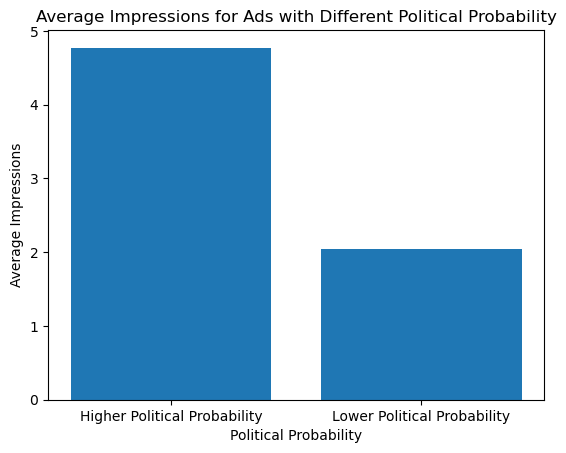

In [46]:
#RQ4 - Do Facebook ads with higher political probability receive more impressions compared to ads with lower political probability?
higher_political_prob_group = fb_df_new[fb_df_new['political_probability'] >= 0.7]
lower_political_prob_group = fb_df_new[fb_df_new['political_probability'] < 0.7]

avg_impressions_higher_prob = higher_political_prob_group['impressions'].mean()
avg_impressions_lower_prob = lower_political_prob_group['impressions'].mean()

print("Average impressions for higher political probability ads:", avg_impressions_higher_prob)
print("Average impressions for lower political probability ads:", avg_impressions_lower_prob)

# Create a bar chart
plt.bar(['Higher Political Probability', 'Lower Political Probability'], [avg_impressions_higher_prob, avg_impressions_lower_prob])
plt.xlabel('Political Probability')
plt.ylabel('Average Impressions')
plt.title('Average Impressions for Ads with Different Political Probability')
plt.show()



Facebook ads with higher political probability tend to receive slightly more impressions compared to ads with lower political probability. 